In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

(0, 200)

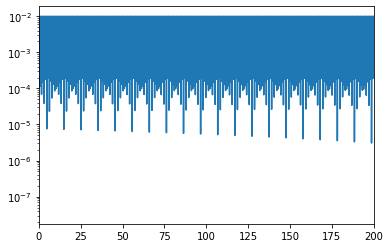

In [24]:
def accel(y):
    return -4*y
tini=0
tmax=3000
yini=3
vini=0
dt=0.01

t=[tini]
y=[yini]
v=[vini+0.5*dt*accel(yini)]

while(t[-1]<tmax):
    y.append(y[-1]+v[-1]*dt)
    t.append(t[-1]+dt)
    v.append(v[-1]+dt*accel(y[-1]))
    
t=np.array(t)
y=np.array(y)
v=np.array(v)

ytrue=3*np.cos(2*t)
E=18
#plt.plot(t, abs(y-ytrue))
plt.plot(t,abs(2*y*y+0.5*v*v-E)/E)
plt.yscale('log')
plt.xlim(0,200)

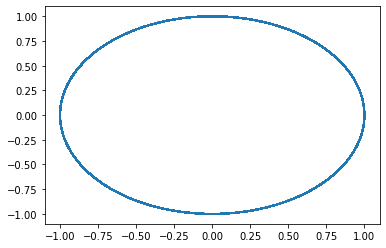

In [45]:
def accel(x, y, t):
    r2=x*x+y*y
    f0=-x/r2
    f1=-y/r2
    return [f0,f1]

x, y, vx, vy,t=1,0,0,1,0

Etot=0.5*(vx*vx+vy*vy)+np.log(np.sqrt(x*x+y*y))
Ltot=x*vy-y*vx


x1=[x]
y1=[y]
vx1=[vx]
vy1=[vy]
E=[Etot]
L=[Ltot]
T=[0]
tmax=3000
f=accel(x, y, t)
hdt=0.005
dt=0.01
vx=vx+hdt*f[0]
vy=vy+hdt*f[1]
t+=hdt
while(t<=tmax):
    x=x+dt*vx
    y=y+dt*vy
    t=t+hdt
    f=accel(x,y,t)
    vhx=vx+hdt*f[0]
    vhy=vy+hdt*f[1]
    
    
    x1.append(x)
    y1.append(y)
    vx1.append(vhx)
    vy1.append(vhy)

    
    E.append(0.5*(vhx*vhx+vhy*vhy)+np.log(np.sqrt(x*x+y*y)))
    L.append(x*vhy-y*vhx)
    vx=vx+dt*f[0]
    vy=vy+dt*f[1]
    t=t+hdt
    T.append(t)
    
plt.plot(x1, y1)



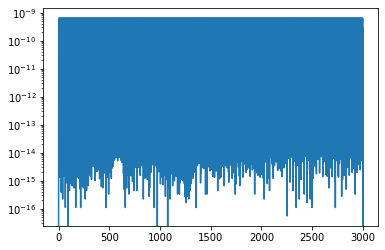

In [46]:
plt.plot(T, abs(np.array(E)-Etot))   
plt.yscale('log')

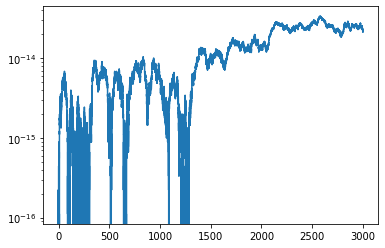

In [47]:
plt.plot(T, abs(np.array(L)-Ltot))
plt.yscale('log')

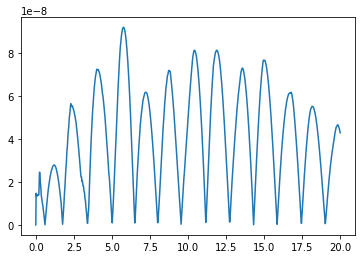

In [40]:
def deriv(y,t,gam,omega):
    dydt0=y[1]
    dydt1=-gam*y[1]-omega*omega*y[0]
    return [dydt0,dydt1]

t=np.linspace(0,20,1000)
yini=[0,2]
y=odeint(deriv,yini,t,args=(0.4,2))
#plt.plot(t,y[:,0])

w1=np.sqrt(2**2-0.4**2/4)
ytrue=(2/w1)*np.exp(-0.4*t/2)*np.sin(w1*t)
plt.plot(t,abs(y[:,0]-ytrue))



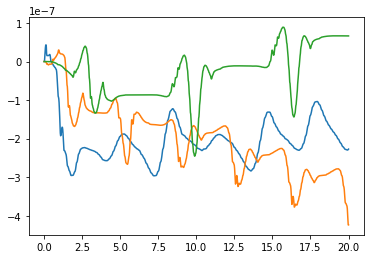

In [32]:
def deriv(y,t):
    dydt0=y[1]
    dydt1=-np.sin(y[0])
    return [dydt0,dydt1]

def E(y):
    return 0.5*y[1]**2+1-np.cos(y[0])

t=np.linspace(0,20,1000)
yini1=[0.1*np.pi,0]
y1=odeint(deriv,yini1,t)
#plt.plot(y1[:,0],y1[:,1])
E1=[]
for data in y1:
    E1.append(E(data))
plt.plot(t,E1/E(yini1)-1)

yini2=[0.5*np.pi,0]
y2=odeint(deriv,yini2,t)
#plt.plot(y2[:,0],y2[:,1])
E2=[]
for data in y2:
    E2.append(E(data))
plt.plot(t,E2/E(yini2)-1)

yini3=[0.9*np.pi,0]
y3=odeint(deriv,yini3,t)
#plt.plot(y3[:,0],y3[:,1])
E3=[]
for data in y3:
    E3.append(E(data))
plt.plot(t,E3/E(yini3)-1)


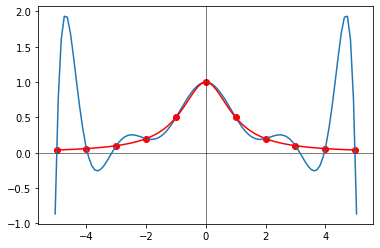

In [61]:
a=np.arange(-5,6)

def f(x):
    return 1/(1+x*x)
b=f(a)
x=np.linspace(-5.05,5.05,100)
y=f(x)
p=np.polyfit(a,b,10)
poly=np.poly1d(p)


plt.axvline(0, linewidth=0.5, c='k')
plt.axhline(0, linewidth=0.5, c='k')
plt.plot(x,poly(x))
plt.plot(x,y,c='r')
plt.scatter(a,b,c='r')

108.78802813226157


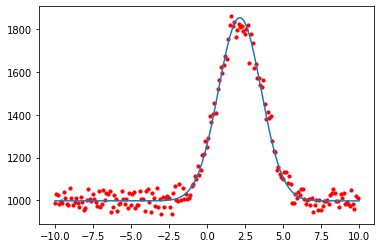

In [11]:
from scipy.odr import *
fn='fakedata.txt'
t,r, rerr=np.loadtxt(fn,unpack=True,usecols=[0,1,2])
n=len(x)

def gauss_func(p, x):
    xc=x-p[2]
    sig2=p[3]**2
    return p[0]+p[1]*np.exp(-0.5*xc**2/sig2)
    
model=Model(gauss_func)

data=RealData(t, r, sy=rerr)
odr=ODR(data, model, beta0=[1000., 1000.,2,1])

out=odr.run()

plt.scatter(t, r,c='r', s=10)

#out.pprint()
print(out.sum_square)
xxx=np.linspace(-10, 10, 1000)
plt.plot(xxx, gauss_func(out.beta, xxx))

[998.49570242   2.16092258   1.43064647]
113.69390169161332


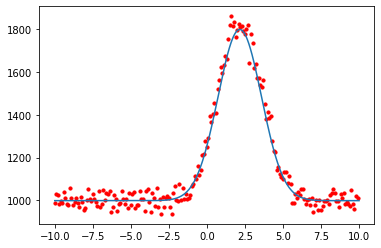

In [15]:
from scipy.odr import *
fn='fakedata.txt'
t,r, rerr=np.loadtxt(fn,unpack=True,usecols=[0,1,2])
n=len(x)

def gauss_func2(p, x):
    xc=x-p[1]
    sig2=p[2]**2
    return p[0]+800*np.exp(-0.5*xc**2/sig2)
    
model2=Model(gauss_func2)

data=RealData(t, r, sy=rerr)
odr=ODR(data, model2, beta0=[1000.,2,1])

out=odr.run()

plt.scatter(t, r,c='r', s=10)

print(out.beta)
print(out.sum_square)
xxx=np.linspace(-10, 10, 1000)
plt.plot(xxx, gauss_func2(out.beta, xxx))

Beta: [-0.05395181 -0.08611537  0.06536881  0.10573871 -0.06435704]
Beta Std Error: [0.0009718  0.00163994 0.00219953 0.00403681 0.0050686 ]
Beta Covariance: [[ 2.63762715e-05  1.01252976e-05 -4.23526198e-05 -6.87747578e-05
   5.79151652e-05]
 [ 1.01252976e-05  7.51134375e-05 -6.98845910e-05 -4.50450306e-05
   8.95275211e-05]
 [-4.23526198e-05 -6.98845910e-05  1.35120829e-04  1.05482622e-04
  -1.53358588e-04]
 [-6.87747578e-05 -4.50450306e-05  1.05482622e-04  4.55134401e-04
  -3.95734055e-04]
 [ 5.79151652e-05  8.95275211e-05 -1.53358588e-04 -3.95734055e-04
   7.17526527e-04]]
Residual Variance: 0.03580448460321076
Inverse Condition #: 0.0691322079280681
Reason(s) for Halting:
  Parameter convergence


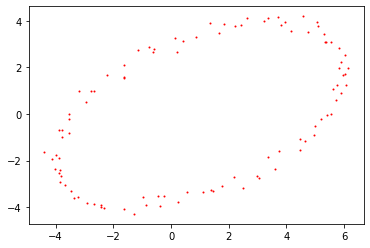

In [18]:
fn='ellipse.txt'
x,y=np.loadtxt(fn,unpack=True,usecols=[0,1])

def ellipse_func(p, x):
    return p[0]*x[0]**2+p[1]*x[1]**2+p[2]*x[0]*x[1]+p[3]*x[0]+p[4]*x[1]+1

data=Data(np.row_stack([x,y]), y=1)
model=Model(ellipse_func, implicit=True)
odr=ODR(data, model, beta0=[1,1,1,1,1], maxit=100)
out=odr.run()
out.pprint()
plt.scatter(x, y, c='r', s=1)
